In [12]:
"""
author: William Darko (repurposed from original author Francois Chollet)
date: June, 2021
description: Two-class (binary) classification using IMDB dataset to classify movie review as positive or negative. The original code sample
is provided by Francois Chollet in his 'Deep Learning with Python' (1st Edition, Manning publisher)
"""


import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
from keras.datasets import imdb


In [3]:
# loading the IMBD dataset

(training_data, training_labels), (testing_data, testing_labels) = imdb.load_data(num_words=10000)
# num_words argument denotes taking the top 10000 most frequent words in the training_data
# training_data, and testing_data are list of reviews where each review is a list of word indices like [1, 14, 28, 99, 299, 87...] from a dictionary of words
# thus the first word in a review [1, 14, 28, 99, 299, 87...], the word at index 0 of the review, is the word at index 1 of the dictionary.
# training_labels and testing_labels are list of 1s and 0s classifying a word as positive, or negative, respectively

# print(training_data[0])



<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/Users/williammatrix/opt/anaconda3/envs/ai/lib/python3.9/site-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/williammatrix/opt/anaconda3/envs/ai/lib/python3.9/site-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

In [4]:
# preparing the data

# one way is to pad the lists to the same length and turn them into integer tensors of shape (samples, word_indices) and use Embedding as the first layer
# other way is to 'One-hot' encode lists, meaning to turn them into vectors of 0s and 1s where 0 denotes no presense of that letter and 1 the opposite
# using One-hot encoding we create a list of length 10000 where there are 0s every where except for the indices which corresponding letters appear in the review sequence

def encode_sequences(sequences, dimesion=10000):
    results =  np.zeros((len(sequences),dimesion))
    for i, review in enumerate(sequences):
        results[i, review] = 1 # equivalent of iterating a through review with a second counter j, and doing results[i][j] = 1
    return results

x_train_data = encode_sequences(training_data) # matrix of 1s and 0s of shape(samples, 10000)
x_test_data = encode_sequences(testing_data)

y_train_labels = np.asarray(training_labels, dtype=np.float32)
y_test_labels = np.asarray(testing_labels, dtype=np.float32)

# print("Training Data: ", x_train_data)
# print("Training Labels: ", y_train_labels)
# print(x_train_data.shape)

In [5]:
# defining the model

network_model = models.Sequential()
network_model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) 
# 16 hidden units, weight matrix will have shape (input_dimension, 16)
network_model.add(layers.Dense(16, activation='relu'))
network_model.add(layers.Dense(1, activation='sigmoid'))
# sigmoid activation function will 'squash' the results into a range of [0,1] which can be thought of as a probability of 
# as how positive a review is



In [6]:
# compiling the model, configuring optimiser, and using custom optimisers

# network_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
# binary_crossentropy will compute the distance between probability distributions we predict as results, and the actual expected result

# network_model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# custom method (throwing error: module 'keras.optimizers' has no attribute 'RMSprop')
# network_model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

network_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
# creating validation set, and training model

validation_x_data = x_train_data[:10000]
partial_xtrain_data = x_train_data[10000:]

validation_y_labels = y_train_labels[:10000]
partial_ytrain_labels = y_train_labels[10000:]

# now train model for 20 epochs (20 iterations over all samples in training tensors), use mini-batches of 512 samples, monitor loass and
# accuracy on the 10000 validation samples by passing the validation data as argument to the 'validation_data' parameter

history = network_model.fit(partial_xtrain_data, partial_ytrain_labels, epochs=4, batch_size=512, validation_data=(validation_x_data, validation_y_labels))
# fit() returns History object
# changed number of epochs to 4 from original 20 as the plot generated shows the validation loss peaking after the 4th epoch and the model becoming less accurate after that.

history_dict = history.history
print(history_dict.keys())

Epoch 1/4
30/30 [==============================] - 16s 43ms/step - loss: 0.5879 - accuracy: 0.7171 - val_loss: 0.3761 - val_accuracy: 0.8740
Epoch 2/4
30/30 [==============================] - 0s 14ms/step - loss: 0.3162 - accuracy: 0.9030 - val_loss: 0.3082 - val_accuracy: 0.8832
Epoch 3/4
30/30 [==============================] - 0s 14ms/step - loss: 0.2247 - accuracy: 0.9307 - val_loss: 0.2975 - val_accuracy: 0.8822
Epoch 4/4
30/30 [==============================] - 0s 13ms/step - loss: 0.1737 - accuracy: 0.9462 - val_loss: 0.2718 - val_accuracy: 0.8901
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


782/782 [==============================] - 1s 1ms/step - loss: 0.2926 - accuracy: 0.8831


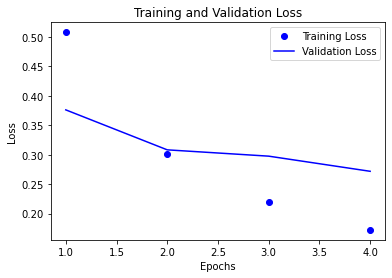

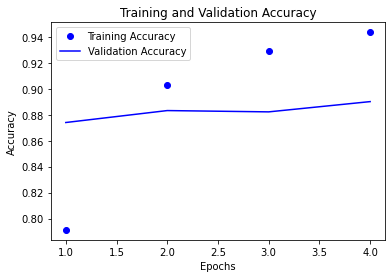

In [10]:
# plotting training and validation loss and accuracy, and model.evaluate on test data

network_model.evaluate(x_test_data, y_test_labels)

training_loss = history_dict['loss']
validation_loss = history_dict['val_loss']

training_accuracy = history_dict['accuracy']

completed_epochs = range(1, len(training_accuracy) + 1)

plt.plot(completed_epochs, training_loss, 'bo', label="Training Loss") # bo for blue dot, and label blue dot 'Training loss' in the legend
plt.plot(completed_epochs, validation_loss, 'b', label="Validation Loss")
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()

validation_accuracy = history_dict['val_accuracy']

plt.plot(completed_epochs, training_accuracy, 'bo', label="Training Accuracy")
plt.plot(completed_epochs, validation_accuracy, 'b', label="Validation Accuracy")
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# using a trained network to generate predictions on new data